In [107]:
import pickle
import pandas as pd
import torch
import io

from explore import LayerwiseQuantizationProblem, QuantizationModel

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)


with open('exploration_15_15_12bit_weighted.pkl', 'rb') as f:
    d = CPU_Unpickler(f).load()

type(d)

pymoo.core.result.Result

In [108]:
from torchvision import models
from pytorch_quantization import nn as quant_nn

m = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)
layer_names = []

for name, module in m.named_modules():
    if isinstance(module, quant_nn.TensorQuantizer):
        layer_names.append(name)


In [109]:
d.opt[0].get("X")

array([ 7,  7, 10, 10,  9,  8,  7, 12,  9, 10, 10,  9,  7, 10,  7, 12, 10,
        9,  7, 11,  6, 11,  5, 10,  4,  9,  9,  8,  6,  9,  9,  9,  5,  9,
        5,  9, 10, 11, 11,  9, 12,  9, 11,  7, 10,  9,  9,  9,  4, 11,  9,
        5,  9,  6, 12, 10,  3,  9,  7,  9,  6,  5,  9,  7, 11,  9,  6,  9,
       10, 10,  3,  5, 11,  9,  8, 11,  7,  4, 12,  6,  5, 12, 10,  9,  6,
        5,  4,  4,  6,  8, 11, 11,  9,  7, 11, 10, 10,  9,  7,  9,  9,  7,
        6, 10,  9, 10,  7,  7,  7])

In [110]:
import numpy as np

pd.set_option('display.max_rows', False)
pop = d.pop

df_data = np.empty( (0, 111) )
for h in d.history:
    for ind in h.opt:
        l = np.concatenate( (ind.get("G") - 0.75, ind.get("F"), ind.get("X")) )
        l = np.expand_dims(l, axis=0)
        df_data = np.concatenate( (df_data, l), axis=0)

print(df_data.shape)
df = pd.DataFrame(df_data, columns=["Acc", "Bits"] + layer_names)

print(len(df))

#df
df['Acc'] = -df['Acc']
#df
df.sort_values('Bits')

(16, 111)
16


,Acc,Bits,conv1._input_quantizer,conv1._weight_quantizer,layer1.0.conv1._input_quantizer,layer1.0.conv1._weight_quantizer,layer1.0.conv2._input_quantizer,layer1.0.conv2._weight_quantizer,layer1.0.conv3._input_quantizer,layer1.0.conv3._weight_quantizer,...,layer4.1.conv3._weight_quantizer,layer4.2.conv1._input_quantizer,layer4.2.conv1._weight_quantizer,layer4.2.conv2._input_quantizer,layer4.2.conv2._weight_quantizer,layer4.2.conv3._input_quantizer,layer4.2.conv3._weight_quantizer,avgpool._input_quantizer,fc._input_quantizer,fc._weight_quantizer
0,0.006836,2148.5,6.0,10.0,8.0,3.0,10.0,11.0,9.0,9.0,...,4.0,10.0,2.0,3.0,3.0,6.0,4.0,5.0,4.0,4.0
14,0.760254,2429.5,7.0,7.0,10.0,10.0,9.0,8.0,7.0,12.0,...,9.0,9.0,7.0,6.0,10.0,9.0,10.0,7.0,7.0,7.0
15,0.760254,2429.5,7.0,7.0,10.0,10.0,9.0,8.0,7.0,12.0,...,9.0,9.0,7.0,6.0,10.0,9.0,10.0,7.0,7.0,7.0
13,0.765137,2449.5,7.0,7.0,10.0,10.0,9.0,8.0,7.0,12.0,...,9.0,9.0,7.0,6.0,10.0,10.0,10.0,7.0,7.0,7.0
12,0.757324,2454.5,7.0,7.0,10.0,10.0,9.0,8.0,7.0,12.0,...,9.0,9.0,7.0,6.0,10.0,10.0,10.0,7.0,7.0,7.0
9,0.763672,2467.5,7.0,7.0,10.0,10.0,9.0,8.0,7.0,12.0,...,9.0,9.0,10.0,6.0,10.0,10.0,10.0,7.0,7.0,7.0
10,0.763672,2467.5,7.0,7.0,10.0,10.0,9.0,8.0,7.0,12.0,...,9.0,9.0,10.0,6.0,10.0,10.0,10.0,7.0,7.0,7.0
11,0.760254,2467.5,7.0,7.0,10.0,10.0,9.0,8.0,7.0,12.0,...,9.0,9.0,10.0,6.0,10.0,9.0,10.0,7.0,7.0,7.0
7,0.760254,2502.5,7.0,7.0,10.0,10.0,9.0,8.0,7.0,12.0,...,9.0,9.0,10.0,6.0,10.0,10.0,10.0,7.0,7.0,11.0
8,0.760254,2502.5,7.0,7.0,10.0,10.0,9.0,8.0,7.0,12.0,...,9.0,9.0,10.0,6.0,10.0,10.0,10.0,7.0,7.0,11.0


16
         Acc    Bits  conv1._input_quantizer  conv1._weight_quantizer  \
0        NaN     NaN                     NaN                      NaN   
1   0.751953  2611.0                     7.0                      7.0   
2   0.756348  2603.5                    12.0                     11.0   
5   0.766113  2568.5                     7.0                     11.0   
6   0.768555  2563.5                     7.0                     11.0   
7   0.760254  2502.5                     7.0                      7.0   
9   0.763672  2467.5                     7.0                      7.0   
11  0.760254  2467.5                     7.0                      7.0   
12  0.757324  2454.5                     7.0                      7.0   
13  0.765137  2449.5                     7.0                      7.0   
14  0.760254  2429.5                     7.0                      7.0   

    layer1.0.conv1._input_quantizer  layer1.0.conv1._weight_quantizer  \
0                               NaN            

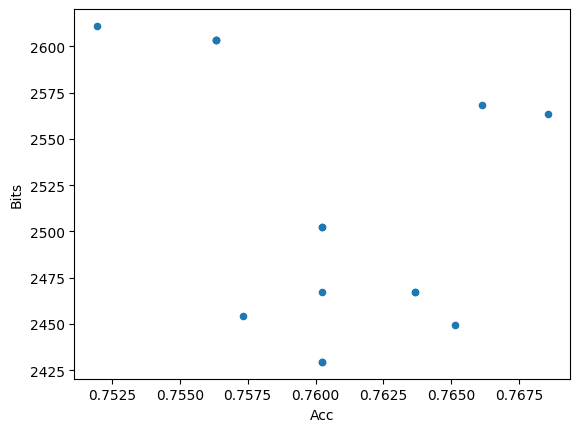

In [116]:
df_sel = df.where(df['Acc'] > 0.75)
df_sel.plot(x='Acc', y='Bits', kind='scatter')
print(df_sel.__len__())
print(df_sel.drop_duplicates())

<AxesSubplot:>

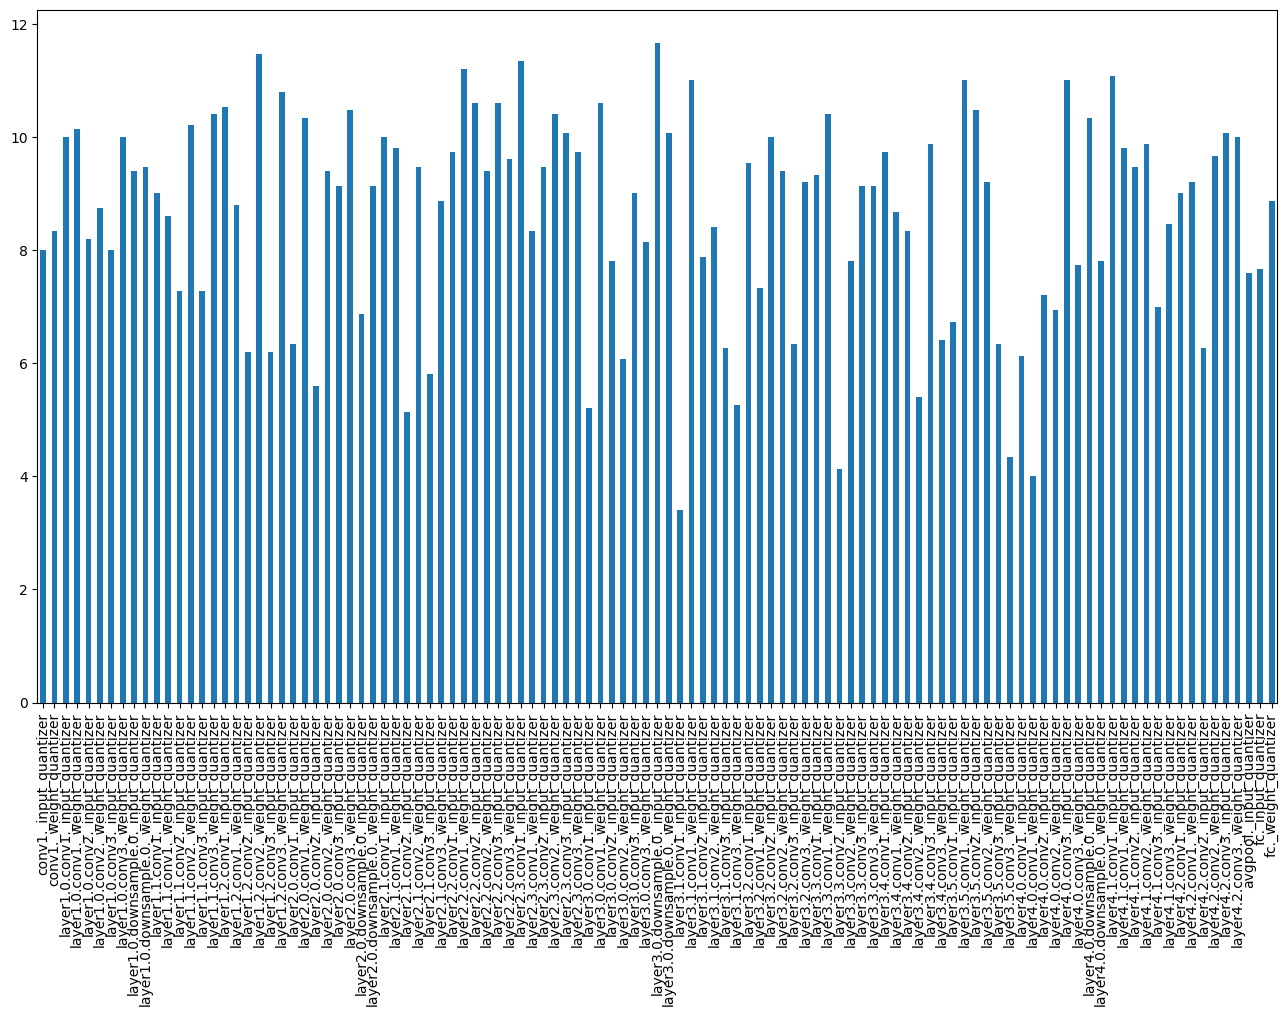

In [102]:
df_means = df_sel.mean().iloc[2:]
df_means.plot(kind='bar', figsize=(16,9))

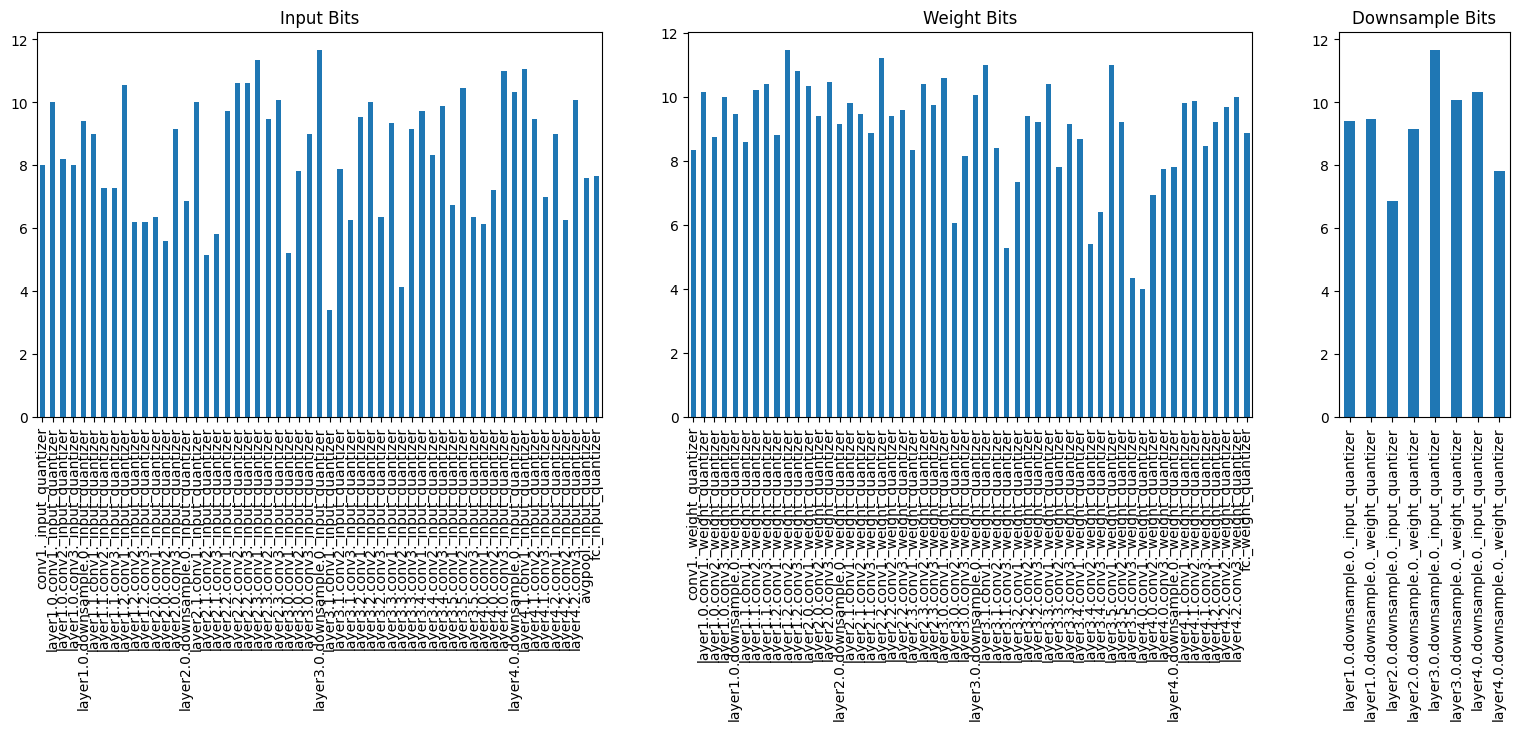

In [103]:
#df_inputs = df_means.loc[:, df_means.columns.str.contains('input')]
import matplotlib.pyplot as plt

df_inputs = df_means.filter(like='input')
df_weights = df_means.filter(like='weight')
df_downsample = df_means.filter(like='downsample')

f, axes = plt.subplots(nrows=1, ncols=3, gridspec_kw={'width_ratios': [3.3, 3.3, 1]})
f.set_figheight(5)
f.set_figwidth(19)
df_inputs.plot(kind='bar', ax=axes[0])
axes[0].set_title("Input Bits")

df_weights.plot(kind='bar', ax=axes[1])
axes[1].set_title("Weight Bits")

df_downsample.plot(kind='bar', ax=axes[2])
axes[2].set_title("Downsample Bits")

f.show()
